In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
import numpy as np

import nfl_data_py as nfl

In [2]:
receivers = pd.read_csv('../data/espn_receiver_stats.csv')

In [3]:
receivers = receivers[receivers['Year'] == 2017].reset_index(drop=True)

In [4]:
receivers

,Player,Team,Pos.,yds,routes,tgts,Yds/Rt,Open,Catch,YAC,OverallOVR,Year
0,Antonio Brown,Steelers,WR,"1,665",502,162,3.3,92,88,56,98,2017
1,DeAndre Hopkins,Texans,WR,"1,378",528,164,2.6,89,87,50,93,2017
2,Michael Thomas,Saints,WR,"1,461",493,158,3.0,87,78,46,86,2017
3,Keenan Allen,Chargers,WR,"1,393",497,151,2.8,85,65,46,78,2017
4,Danny Amendola,Patriots,WR,"1,007",454,110,2.2,77,80,40,78,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
106,Roger Lewis,Giants,WR,416,402,69,1.0,23,38,42,24,2017
107,Brandon LaFell,Bengals,WR,548,431,73,1.3,29,27,43,22,2017
108,Jaron Brown,Cardinals,WR,477,470,67,1.0,21,28,43,18,2017
109,Marcedes Lewis,Jaguars,TE,339,381,50,0.9,13,34,47,18,2017


In [5]:
receivers = receivers[['Player', 'Team', 'tgts', 'Yds/Rt', 'YAC', 'Open', 'Catch', 'Pos.']]

In [6]:
receivers = receivers[receivers['Pos.'] == 'WR']

In [7]:
teams = nfl.import_team_desc()

In [8]:
receivers = receivers.merge(teams, left_on='Team', right_on='team_nick', how='inner')

In [9]:
receivers = receivers.drop_duplicates(subset=['Player'])

In [10]:
# with at least 70 targets
receivers = receivers[receivers['tgts'] >= 70]

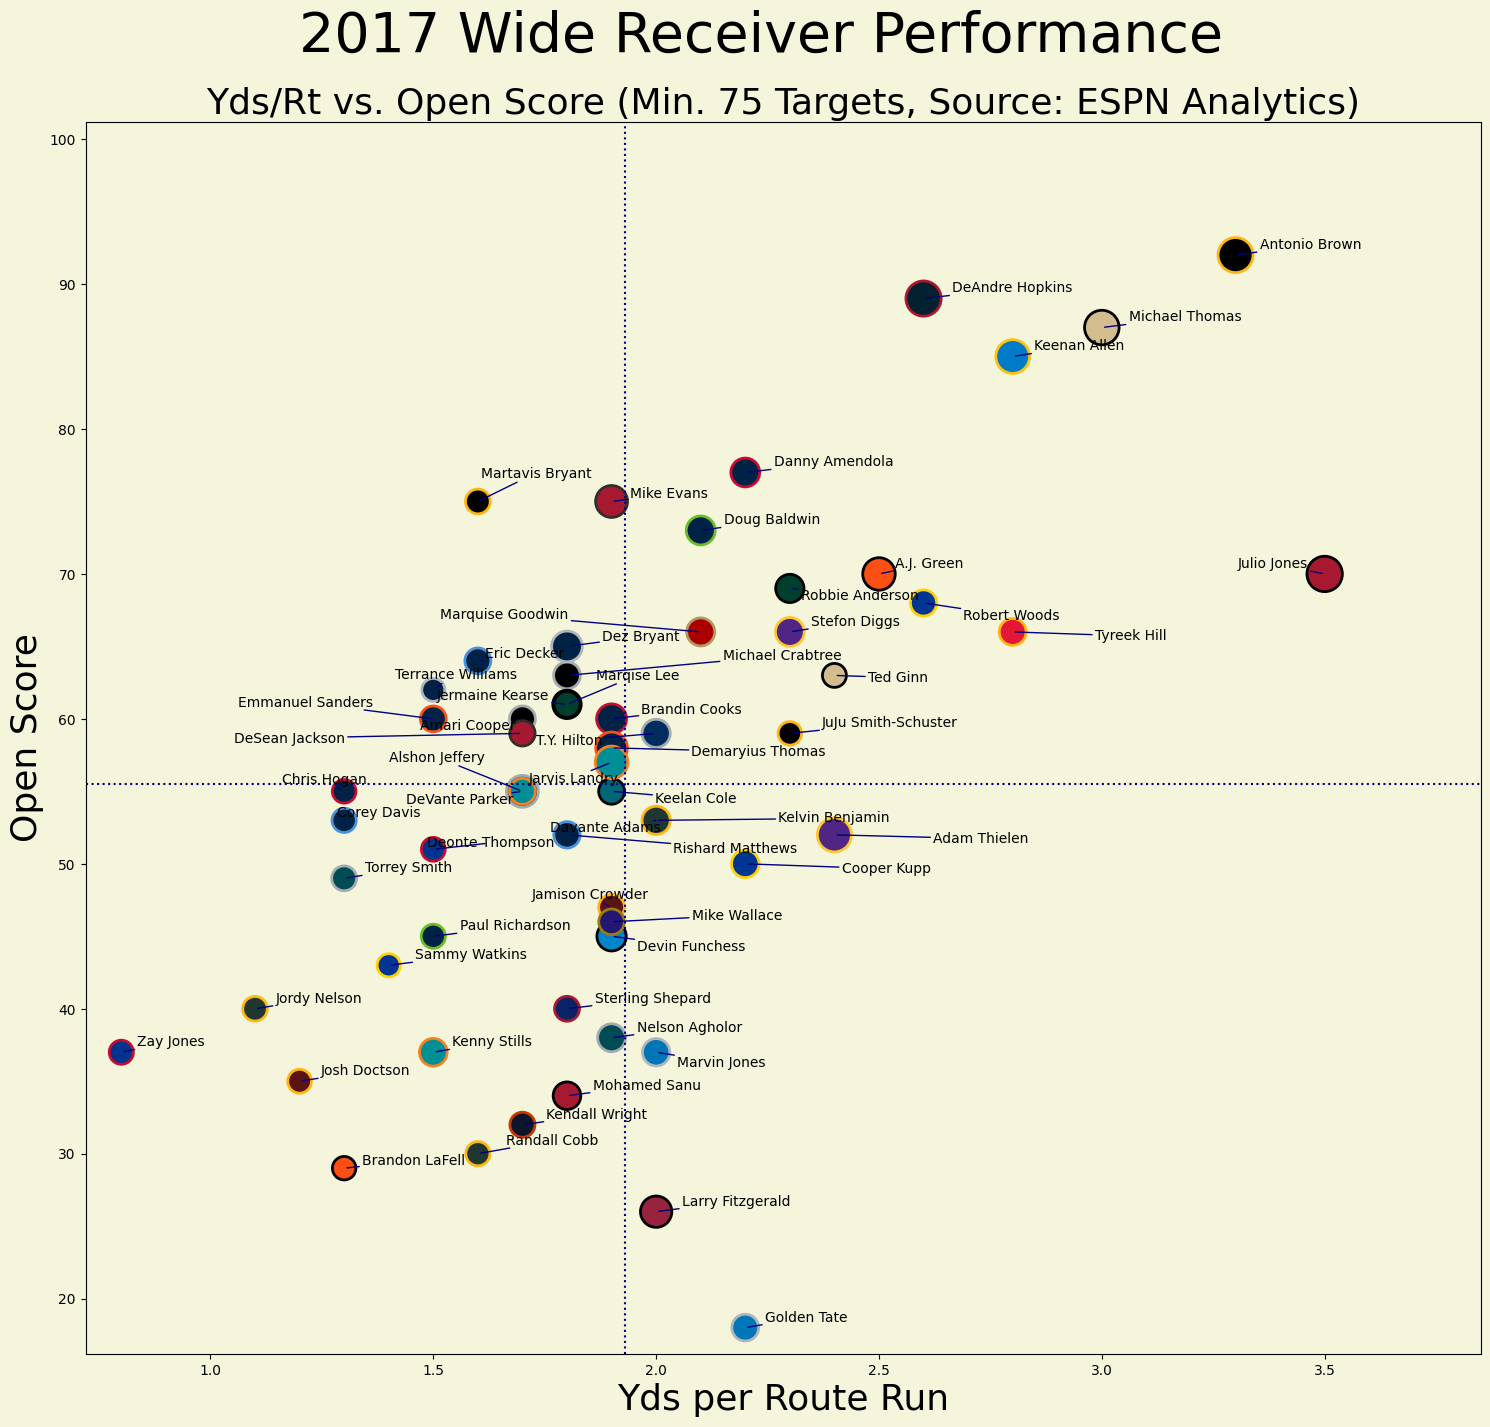

In [12]:
fig, ax = plt.subplots(figsize=(18, 16))

fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# Use scatter points instead of logos
# adjust size of points relative to 'Att'
point_size = receivers['tgts'] / max(receivers['tgts']) * 650
scatter = ax.scatter(receivers['Yds/Rt'], receivers['Open'], c=receivers['team_color'],
                     s=point_size, edgecolor=receivers['team_color2'], linewidth=2)

texts = []
for x0, y0, player in zip(receivers['Yds/Rt'], receivers['Open'], receivers['Player']):
    texts.append(ax.text(x0, y0, player, fontsize=10))

# Adjust text labels
adjust_text_params = {
    'texts': texts,
    'expand_points': (1.5, 1.5),
    'expand_text': (1.5, 1.5),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'navy',
    },
}
adjust_text(**adjust_text_params)

plt.suptitle("2017 Wide Receiver Performance",
             fontsize=40, y=0.95, ha='center')
plt.title("Yds/Rt vs. Open Score (Min. 75 Targets, Source: ESPN Analytics)",
          fontsize=26, y=1.0, ha='center')
plt.xlabel('Yds per Route Run', fontsize=26)
plt.ylabel('Open Score', fontsize=26)

# make the axes limits +10% of the max value
x_max = receivers['Yds/Rt'].max()
y_max = receivers['Open'].max()

# make the axes minimums -10% of the max value
x_min = receivers['Yds/Rt'].min()
y_min = receivers['Open'].min()

# set the axes limits
plt.xlim(x_min * 0.9, x_max * 1.1)
plt.ylim(y_min * 0.9, y_max * 1.1)

# Draw horizontal and vertical lines at the mean of each axis
mean_y = receivers['Open'].mean()
mean_x = receivers['Yds/Rt'].mean()

plt.axhline(mean_y, color='navy', linestyle='dotted')
plt.axvline(mean_x, color='navy', linestyle='dotted')

# Save the plot as a high-quality image
plt.savefig('../images/espn_wrs_Open17.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()